Q1: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd

In [2]:
company = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/assignments/CompanyData.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


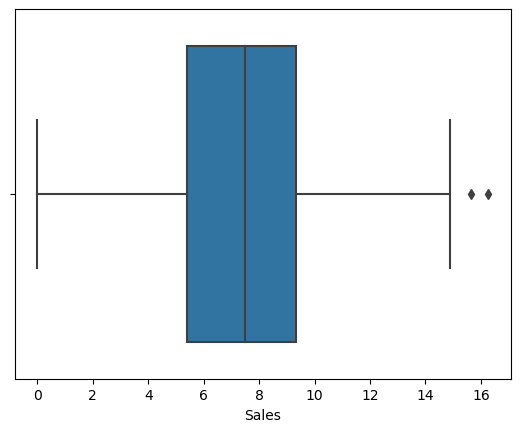

In [8]:
import seaborn as sns
box = sns.boxplot(company['Sales'])

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=9,5

skew: 0.18556036318721578
kurt: -0.08087736743346197


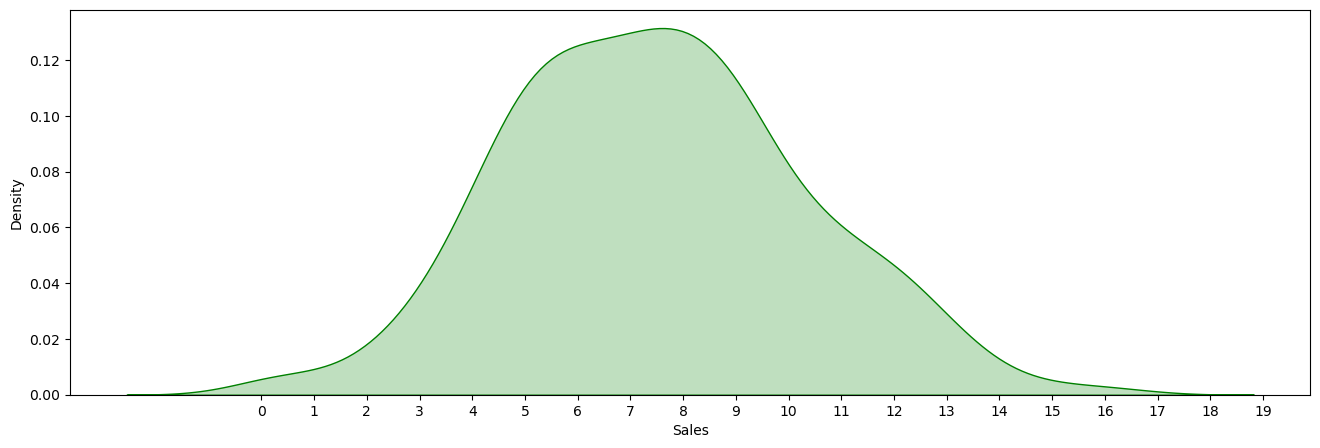

In [10]:
plt.figure(figsize=(16,5))
print('skew: {}'.format(company['Sales'].skew()))
print('kurt: {}'.format(company['Sales'].kurtosis()))
kde = sns.kdeplot(company['Sales'],shade= True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

THIS DATA HAS NEGATIVE KURTOSIS AND RIGHT SKEWED.

In [11]:
col_obj = company.select_dtypes(include='object').columns.tolist()

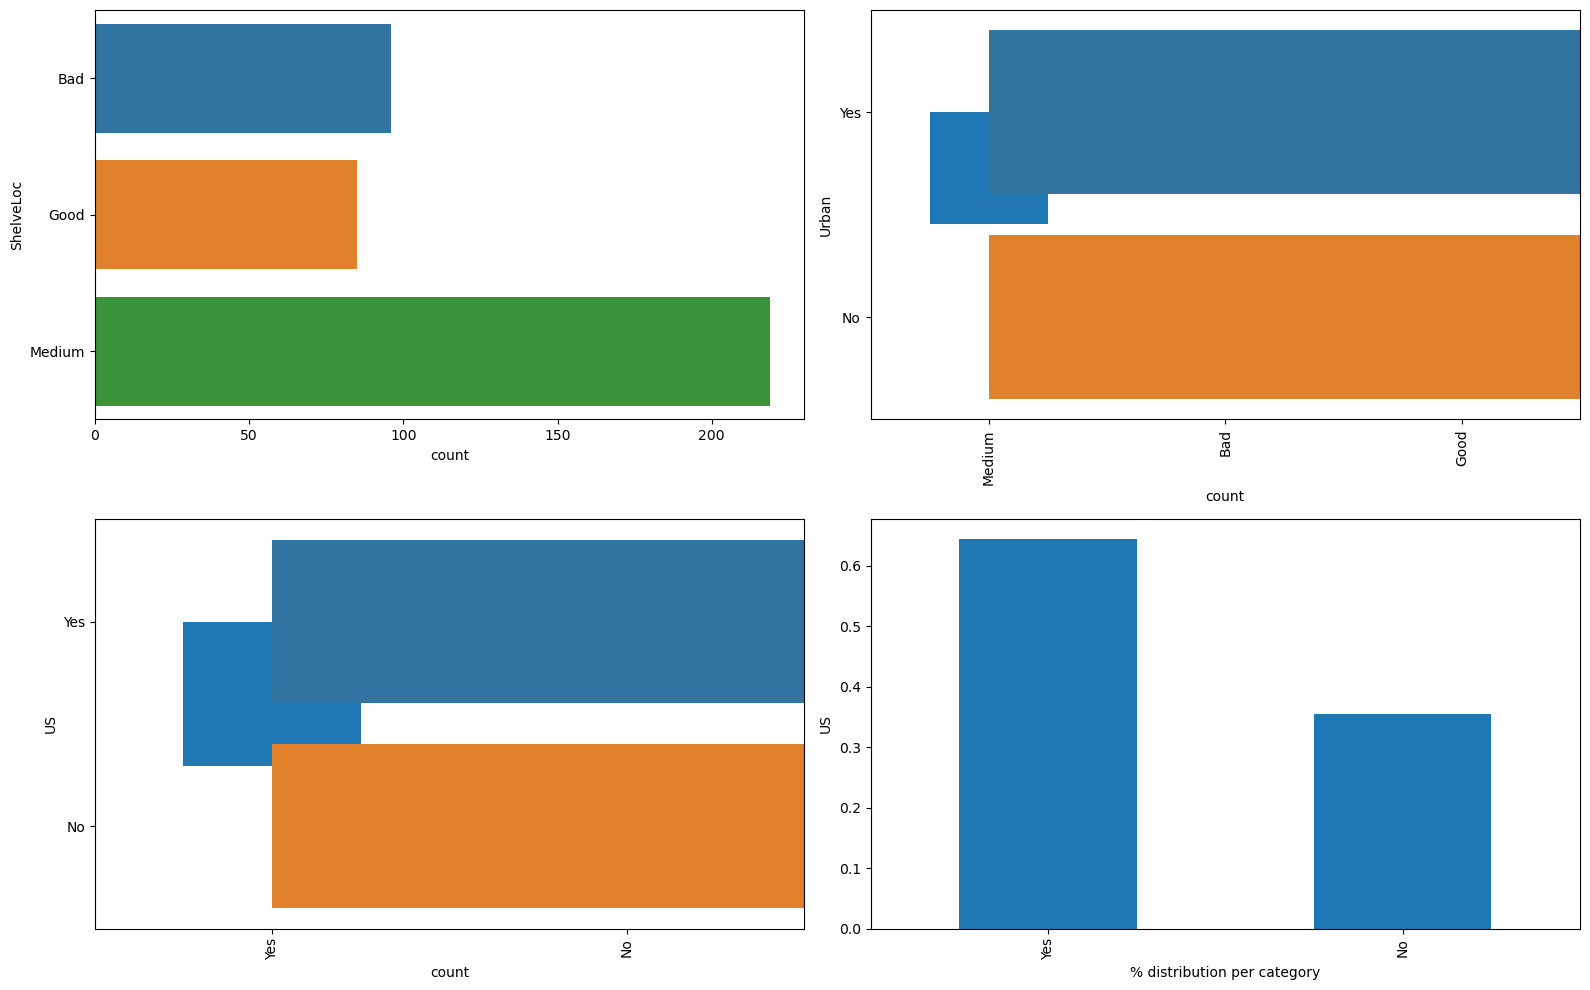

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(col_obj,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company,y=col)
    plt.subplot(2,2,i+1)
    company[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [13]:
col_num = company.select_dtypes(exclude='object').columns.tolist()

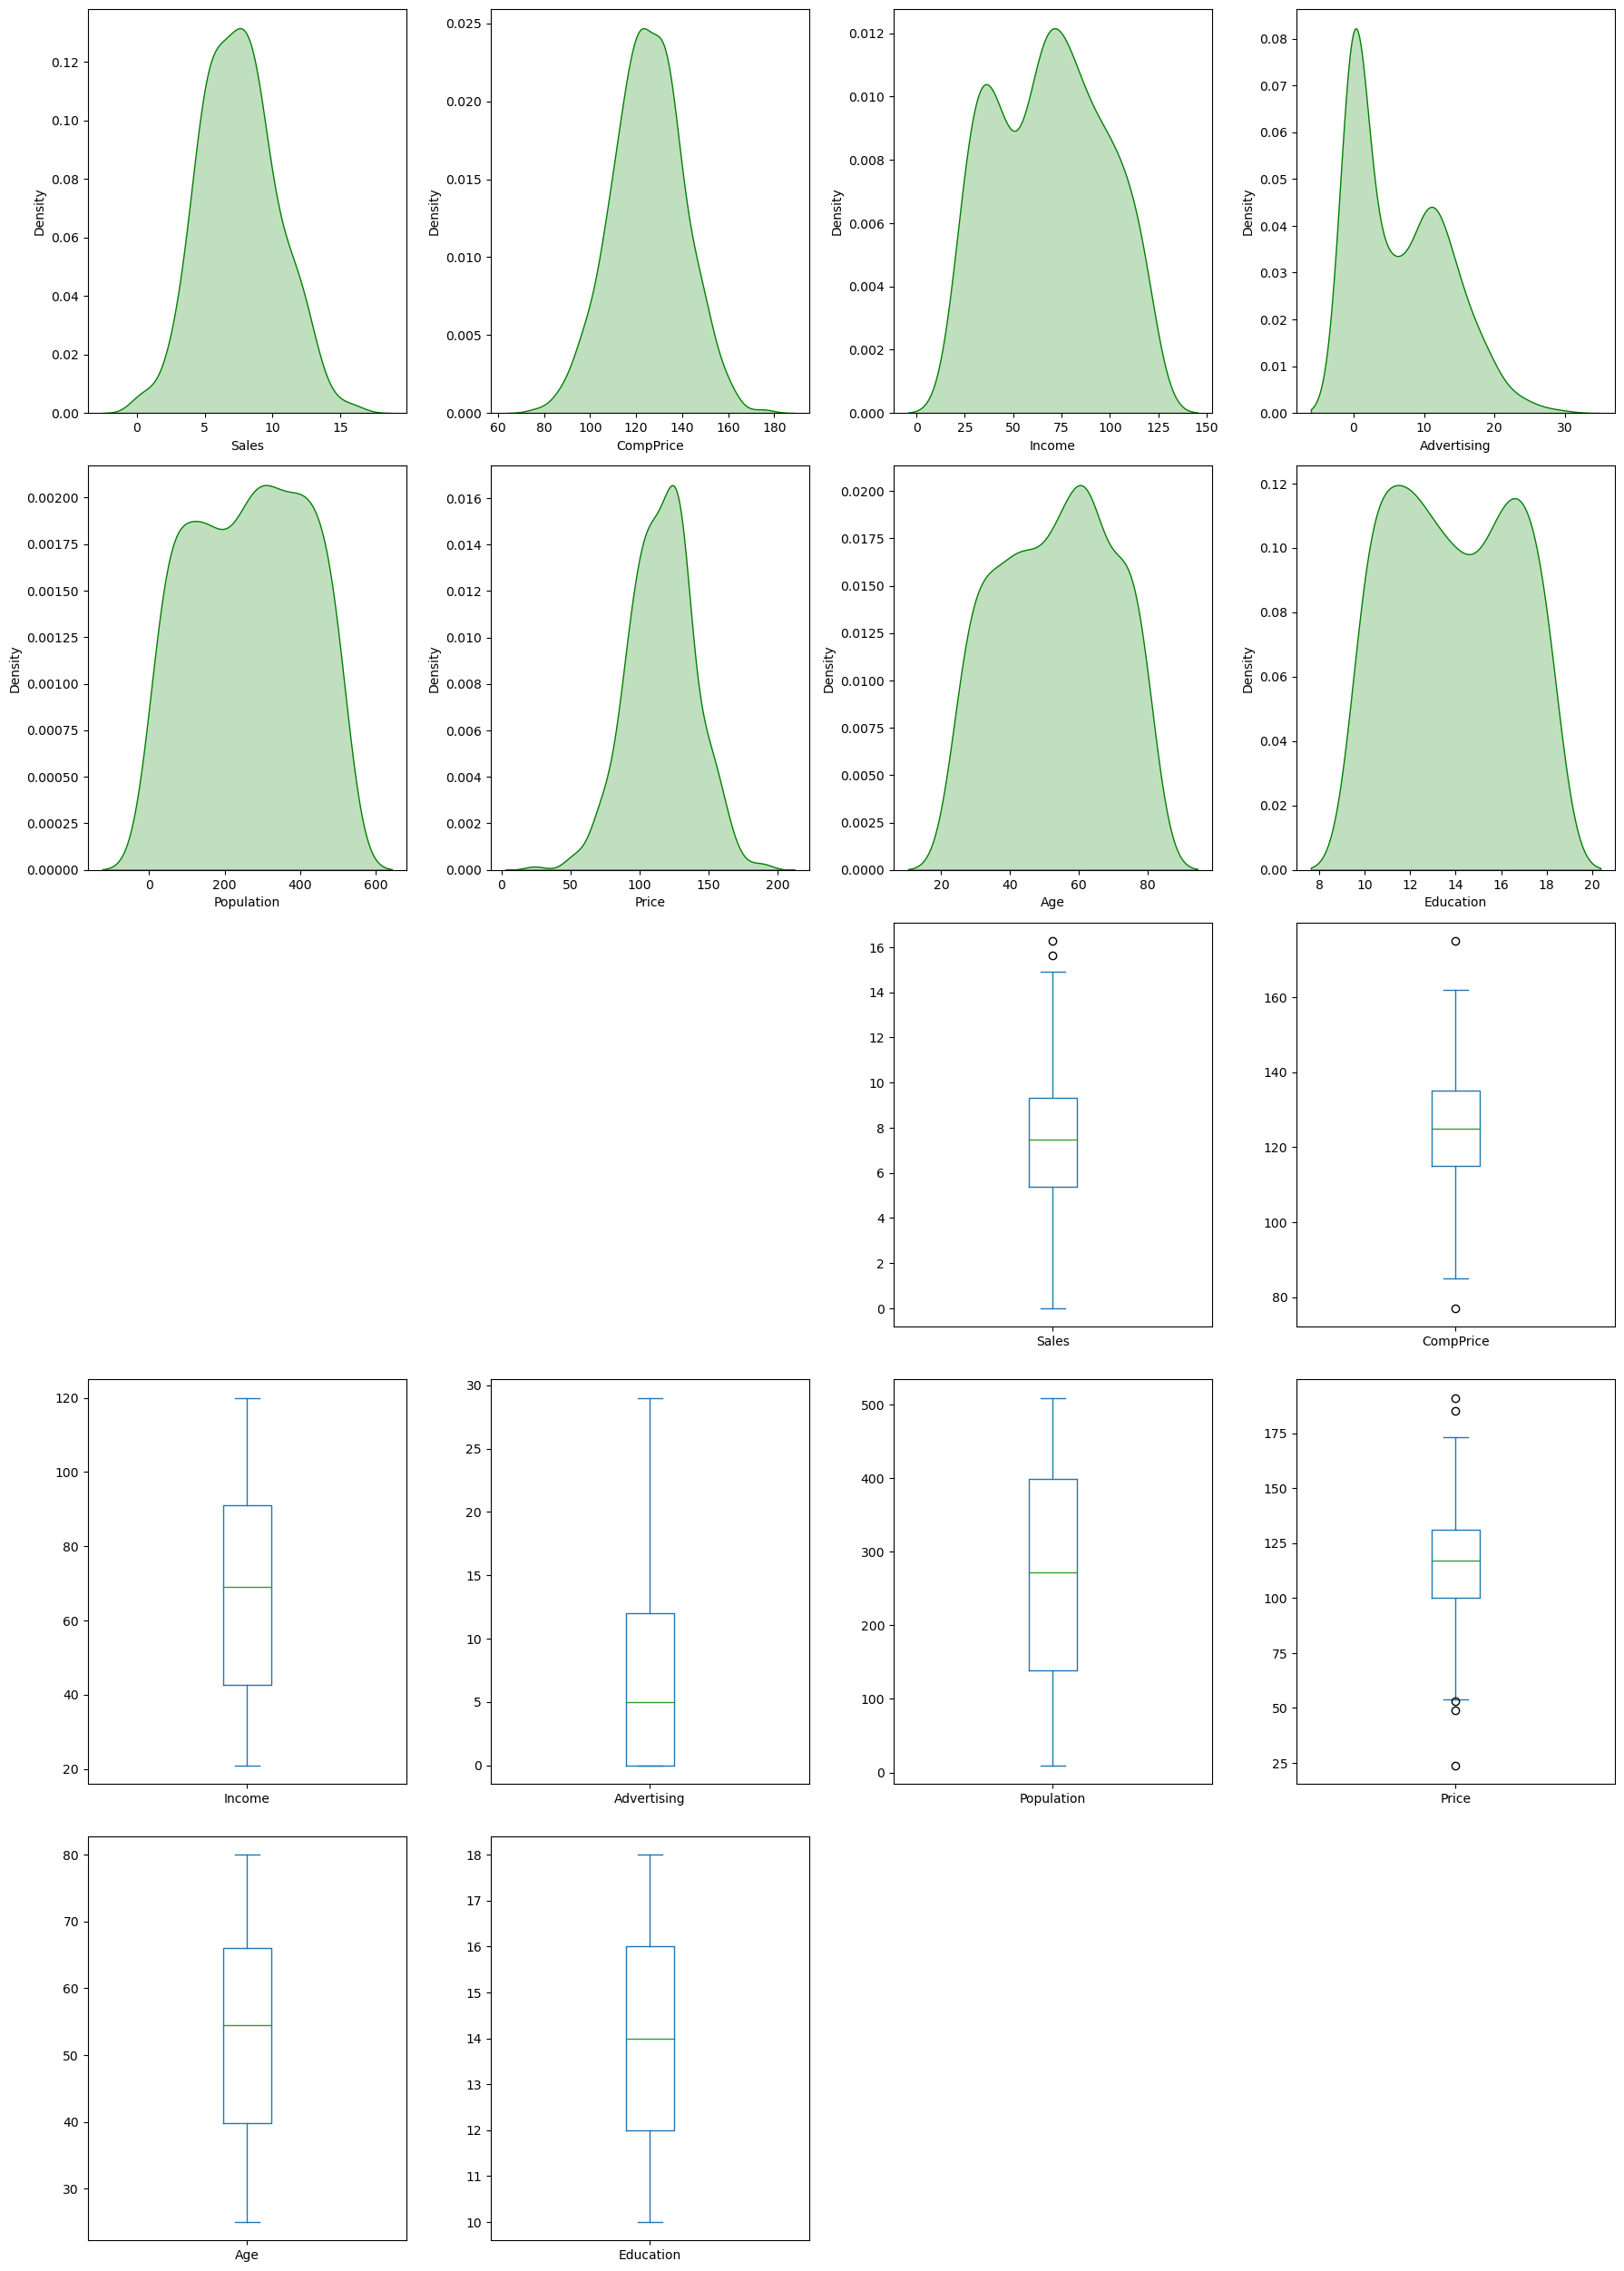

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(col_num,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    company[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = company[col_num]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
corr = company.corr()

In [16]:
company = pd.get_dummies(company,columns = ['ShelveLoc','Urban','US'])

<AxesSubplot:>

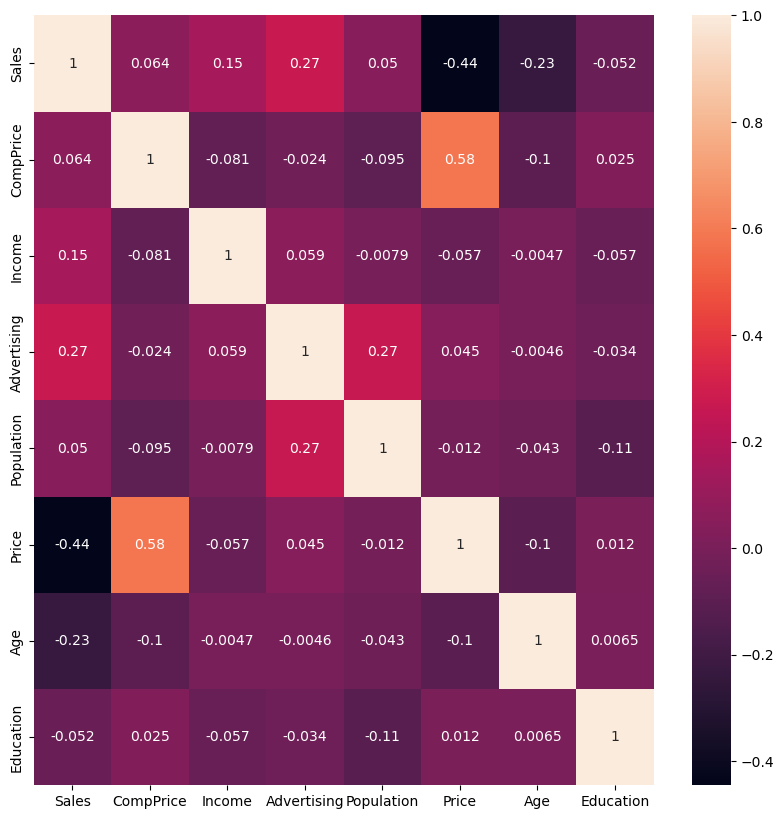

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [18]:
company["sales"]="small"
company.loc[company["Sales"]>7.49,"sales"]="large"
company.drop(["Sales"],axis=1,inplace=True)

In [19]:
x = company.iloc[:,0:14]
y = company.iloc[:,14]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
13,115,28,11,29,86,53,18,0,1,0,0,1,0,1
249,125,67,0,86,117,65,11,1,0,0,0,1,1,0
121,125,89,10,380,87,28,10,1,0,0,0,1,0,1
383,98,117,0,76,68,63,10,0,0,1,0,1,1,0
28,103,74,0,359,97,55,11,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,127,90,14,16,70,48,15,0,0,1,1,0,0,1
104,121,96,0,472,138,51,12,0,0,1,0,1,1,0
335,120,70,15,464,110,72,15,0,0,1,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1


In [22]:
x_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
360,118,86,7,265,114,52,15,0,1,0,1,0,0,1
92,114,113,0,97,125,29,12,0,0,1,0,1,1,0
354,133,31,1,80,145,42,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1
212,145,69,19,501,105,45,11,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,111,101,17,266,91,63,17,0,0,1,1,0,0,1
369,135,100,22,463,122,36,14,0,0,1,0,1,0,1
287,95,44,4,208,72,44,17,1,0,0,0,1,0,1
337,130,38,0,283,102,80,15,0,0,1,0,1,1,0


In [23]:
y_train

13     large
249    small
121    large
383    large
28     small
       ...  
46     large
104    small
335    small
2      large
262    small
Name: sales, Length: 320, dtype: object

In [24]:
y_test

360    large
92     small
354    small
398    small
212    large
       ...  
350    large
369    large
287    small
337    large
201    small
Name: sales, Length: 80, dtype: object

In [25]:
y_train.value_counts()

large    166
small    154
Name: sales, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier as RF
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.80625

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pred_train = model.predict(x_train)
print('TRAIN DATA\n\n•ACCURACY SCORE: ',accuracy_score(y_train,pred_train))
print('\n•CONFUSION MATRIX: \n',confusion_matrix(y_train,pred_train))

TRAIN DATA

•ACCURACY SCORE:  1.0

•CONFUSION MATRIX: 
 [[166   0]
 [  0 154]]


In [29]:
pred_test = model.predict(x_test)
print('TEST DATA\n\n•ACCURACY SCORE: ',accuracy_score(y_test,pred_test))
print('\n\n•CONFUSION MATRIX: \n',confusion_matrix(y_test,pred_test))

TEST DATA

•ACCURACY SCORE:  0.775


•CONFUSION MATRIX: 
 [[24  9]
 [ 9 38]]


In [30]:
company_t = pd.DataFrame({'Actual':y_test,'Predicted':pred_test})

In [31]:
company_t

,Actual,Predicted
360,large,large
92,small,large
354,small,small
398,small,small
212,large,large
...,...,...
350,large,large
369,large,large
287,small,large
337,large,small


In [32]:
columns = list(company.columns)
predictors = columns[0:14]
target = columns[14]

In [33]:
rf_small = RF(n_estimators=10,max_depth=3)

In [34]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [35]:
model.feature_importances_

array([0.10915007, 0.10469336, 0.09053372, 0.08504362, 0.23839232,
       0.12722188, 0.05609299, 0.04003678, 0.07498181, 0.02355718,
       0.01223794, 0.01346274, 0.01228987, 0.01230571])

In [36]:
FI = pd.DataFrame({'feature':list(x_train.columns),'importance':model.feature_importances_}).sort_values('importance',ascending=True)

In [37]:
FI

,feature,importance
10,Urban_No,0.012238
12,US_No,0.012290
13,US_Yes,0.012306
11,Urban_Yes,0.013463
9,ShelveLoc_Medium,0.023557
7,ShelveLoc_Bad,0.040037
6,Education,0.056093
8,ShelveLoc_Good,0.074982
3,Population,0.085044
2,Advertising,0.090534
